In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_bum = pd.read_csv("bumble_google_play_reviews.csv")
df_tin = pd.read_csv("tinder_google_play_reviews.csv")
df_hin = pd.read_csv("hinge_google_play_reviews.csv")

In [3]:
df_bum.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,bf09317b-a399-4e92-b896-6a93c9406eda,Terrence Harris-Hughes,https://play-lh.googleusercontent.com/a/AEdFTp...,Why games? Can't we just do it. If you just go...,1,16,NaN,2022-12-11 01:55:12,NaN,NaN
1,97493fcd-70d3-47de-b636-edd95a084b2a,Aksheta Chougaonkar,https://play-lh.googleusercontent.com/a/AEdFTp...,There is bug in security code. I cannot just s...,1,0,5.298.0,2022-12-11 01:48:17,NaN,NaN
2,8edc37a4-45da-4a28-9d92-fff18f14f8f9,leila nasimi,https://play-lh.googleusercontent.com/a-/AD5-W...,"The app is good and user-friendly, but there i...",3,0,5.298.0,2022-12-11 01:15:03,NaN,NaN
3,30fe19dd-264c-47bc-b301-5b085d1d5e1c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,-2 stars. Screw these moneygrabbing bastards,1,2,5.284.0,2022-12-11 00:51:53,If there's anything we can do to help make you...,2022-09-04 13:37:26
4,a5aaed6a-2dd5-41f3-9cc5-7e64d398235e,Joey B,https://play-lh.googleusercontent.com/a/AEdFTp...,Very small stupid things that make it annoying...,2,0,5.298.0,2022-12-11 00:21:16,NaN,NaN


In [4]:
df_tin.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,e6d3a576-c0b5-456d-a161-a03a21635390,Kranan Vlogs,https://play-lh.googleusercontent.com/a-/AD5-W...,soon.,5,0,13.23.0,2022-12-15 21:04:58,NaN,NaN
1,acb008f0-be43-4363-83c4-35581ed81c22,Aayush Gautam,https://play-lh.googleusercontent.com/a-/AD5-W...,A fraud app. Even if you go with gold or premi...,1,0,13.23.0,2022-12-15 20:52:36,NaN,NaN
2,2bd80134-54b6-4363-9c70-2fa8023b49e3,Stinkin Dinkins,https://play-lh.googleusercontent.com/a-/AD5-W...,honestly I'm a thicker guy. so I know I wouldn...,1,0,13.23.0,2022-12-15 20:47:40,NaN,NaN
3,f52d8a14-e901-472e-8fe6-40f2c7f4b931,king catnip,https://play-lh.googleusercontent.com/a-/AD5-W...,I've swiped left on the same people more than ...,1,208,13.10.1,2022-12-15 20:45:36,NaN,NaN
4,e62d8632-a665-4f39-bbcf-fa4c7bc36402,Nicholas Scull,https://play-lh.googleusercontent.com/a-/AD5-W...,Got banned for being genderfluid! All I did wa...,1,0,NaN,2022-12-15 20:39:54,NaN,NaN


In [5]:
df_hin.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1910bbde-e48d-43d6-ac0a-fe516b07ddca,Aaron Osborne,https://play-lh.googleusercontent.com/a-/AD5-W...,This used to be a great app but it has been ru...,1,116,9.11.2,2022-12-10 01:28:46,NaN,NaN
1,ed8b6d91-6a79-4bc4-8e53-bfa90a4d13dd,Frank Jandl,https://play-lh.googleusercontent.com/a-/AD5-W...,Not that great. Maybe I live in the wrong area...,2,0,9.11.2,2022-12-10 01:28:00,NaN,NaN
2,d58dd19e-c6b7-469e-be8f-25a83d397319,H,https://play-lh.googleusercontent.com/a/AEdFTp...,Used to like the app before a TON of male scam...,1,3,9.9.1,2022-12-10 01:23:20,NaN,NaN
3,b6769fa8-28b4-4e02-bcc3-fa09ea832134,Omar Sharif,https://play-lh.googleusercontent.com/a-/AD5-W...,The sms pin no longer comes through. i made no...,1,0,8.30.0,2022-12-10 00:55:46,NaN,NaN
4,ad4fc20a-2add-465d-8d73-fcbf4a0f1aca,Logan Z,https://play-lh.googleusercontent.com/a/AEdFTp...,Have to pay 15$minimum to like any attractive ...,1,0,9.11.2,2022-12-09 23:50:14,NaN,NaN


In [5]:
print("Bumble Data Features: " + str(list(df_bum.columns)))
print("Hinge Data Features: " + str(list(df_hin.columns)))
print("Tinder Data Features: " + str(list(df_tin.columns)))

Bumble Data Features: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
Hinge Data Features: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
Tinder Data Features: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']


In [7]:
print("Data types of each column of Bumble DF")
df_bum.dtypes

Data types of each column of Bumble DF


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [6]:
print("Data types of each column of Hinge DF")
df_hin.dtypes

Data types of each column of Hinge DF


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [9]:
print("Data types of each column of Tinder DF")
df_tin.dtypes

Data types of each column of Tinder DF


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [7]:
print(df_hin['score'].unique())
print(df_bum['score'].unique())
print(df_tin['score'].unique())

[1 2 3 5 4]
[1 3 2 5 4]
[5 1 4 2 3 0]


## Dataset Features

* `content`(object): User's review (txt)

* `score` (int64): Review score ranging from 0 to 5

* `thumbsUpCount` (int64): Number of users who found the review response helpful

* `reviewCreatedVersion` (object): Version of the app when the review was posted

* `at` (objet): Date of review was posted

In [8]:
features = ["content","score","thumbsUpCount","reviewCreatedVersion","at"]

In [9]:
df_bum2 = df_bum[features]
df_hin2 = df_hin[features]
df_tin2 = df_tin[features]

df_bum2.insert(0,'app',"B")
df_hin2.insert(0,'app',"H")
df_tin2.insert(0,'app',"T")

In [10]:
df = pd.concat([df_bum2, df_hin2, df_tin2])
df.insert(0,"id",df.index+1)

In [34]:
# Remove the rows where content is missing
df['NA'] = df['content'].isnull()
df = df[df['NA'] == False]
df.pop("NA")
df.head()

,id,app,content,score,thumbsUpCount,reviewCreatedVersion,at
0,1,B,Why games? Can't we just do it. If you just go...,1,16,NaN,2022-12-11 01:55:12
1,2,B,There is bug in security code. I cannot just s...,1,0,5.298.0,2022-12-11 01:48:17
2,3,B,"The app is good and user-friendly, but there i...",3,0,5.298.0,2022-12-11 01:15:03
3,4,B,-2 stars. Screw these moneygrabbing bastards,1,2,5.284.0,2022-12-11 00:51:53
4,5,B,Very small stupid things that make it annoying...,2,0,5.298.0,2022-12-11 00:21:16


## Text Analysis

In [37]:
def processText(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')
    return text

In [38]:
df['content'] = processText(df['content'])

<ipython-input-37-c6ebaa710e07>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("(<br/>)", "")
<ipython-input-37-c6ebaa710e07>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(<a).*(>).*(</a>)', '')
<ipython-input-37-c6ebaa710e07>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&amp)', '')
<ipython-input-37-c6ebaa710e07>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&gt)', '')
<ipython-input-37-c6ebaa710e07>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&lt)', '')
<ipython-input-37-c6ebaa710e07>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.st

In [43]:
df['polarity'] = df['content'].map(lambda txt: TextBlob(txt).sentiment.polarity)

In [45]:
df['reviewLen'] = df['content'].astype(str).apply(len)
df['wordCount'] = df['content'].apply(lambda x: len(str(x).split()))

In [47]:
df.head()

,id,app,content,score,thumbsUpCount,reviewCreatedVersion,at,polarity,reviewLen,wordCount
0,1,B,Why games? Can't we just do it. If you just go...,1,16,NaN,2022-12-11 01:55:12,-1.000000,131,26
1,2,B,There is bug in security code. I cannot just s...,1,0,5.298.0,2022-12-11 01:48:17,-0.250000,86,19
2,3,B,"The app is good and user-friendly, but there i...",3,0,5.298.0,2022-12-11 01:15:03,0.235863,420,78
3,4,B,-2 stars. Screw these moneygrabbing bastards,1,2,5.284.0,2022-12-11 00:51:53,0.000000,44,6
4,5,B,Very small stupid things that make it annoying...,2,0,5.298.0,2022-12-11 00:21:16,-0.390000,206,36


In [114]:
df_bum2 = df.loc[df.app == 'B']
df_hin2 = df.loc[df.app == 'H']
df_tin2 = df.loc[df.app == 'T']

### List out reviews based on polarity scores

In [115]:
def listPolarity(df, pol, col_name, n):
    col = df.loc[df.polarity == pol, [col_name]].sample(n).values
    for c in col:
        print(c[0])

#### Bumble

In [154]:
print("Bumble reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df_bum2, 1, 'content', 5)
print("")
print("Bumble reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df_bum2, 0, 'content', 5)
print("")
print("Bumble reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df_bum2, -1, 'content', 5)

Bumble reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
best app ever
BEST APP TO EXPLORE AND FIND BUSINESS CONNECTION
It is awesome
awesome app!
Awesome 👍

Bumble reviews with most neutral sentiment polarity: 
-----------------------------------------------
I just want to delete my account help me out
DO NOT PAY FOR THE APP. I REPEAT Do NOT
you're doing a lot right<3 so YAY! this needs to improve<3
$BMBL to the moon!
Third class app.

Bumble reviews with the highest negative sentiment polarity: 
------------------------------------------------------
no one reply worst App don't download.
Awful
Bhikhari.APK. Laggy, Bully, Boring, Time wasting, Wanted money, Lol😁. If you get money than you can do anything.
Terrible.
Please fix the send button, sometimes if I want to press the send button, what comes out is the gallery of my cellphone !!! please stupid, fix it soon !!


#### Hinge

In [155]:
print("Hinge reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df_hin2, 1, 'content', 5)
print("")
print("Hinge reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df_hin2, 0, 'content', 5)
print("")
print("Hinge reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df_hin2, -1, 'content', 5)

Hinge reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
Great!
I think it is the best dating app
Perfect app
Great!!!
Excellent

Hinge reviews with most neutral sentiment polarity: 
-----------------------------------------------
we shall see b
You can send messages to people you're attracted to.
Phone number changed and found out the phone number was banned and idk the name of the account.
So many fake profiles and people who don't reply.
It's alright 🤷‍♂️

Hinge reviews with the highest negative sentiment polarity: 
------------------------------------------------------
Awful, doesnt even work
Disgusting 🤮. Banned me for no reason.
the messaging is so horrible
Horrible
Terrible app, the customer support team is if no use. I wouldn't pay for this service


#### Tinder

In [156]:
print("Tinder reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df_tin2, 1, 'content', 5)
print("")
print("Tinder reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df_tin2, 0, 'content', 5)
print("")
print("Tinder reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df_tin2, -1, 'content', 5)

Tinder reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
Excellent app
awesome
Awesome
Great!
Excellent

Tinder reviews with most neutral sentiment polarity: 
-----------------------------------------------
It actually works
Still waiting
Phoenix wright approved
Every time I try to open my messages the app crashes.
Man: 0 like per hour Woman: 1 000 like per hour

Tinder reviews with the highest negative sentiment polarity: 
------------------------------------------------------
worst application ..
Terrible
Worst
Trash. Quality of people on this app is awful.
The worst


#### Overall Apps

In [136]:
print("Overall reviews with the highest positive sentiment polarity: ")
print("-----------------------------------------------------")
listPolarity(df, 1, 'content', 5)
print("")
print("Overall reviews with most neutral sentiment polarity: ")
print("-----------------------------------------------")
listPolarity(df, 0, 'content', 5)
print("")
print("Overall reviews with the highest negative sentiment polarity: ")
print("------------------------------------------------------")
listPolarity(df, -1, 'content', 5)

Overall reviews with the highest positive sentiment polarity: 
-----------------------------------------------------
Awesome
Perfect
Great app!
This is the best thing happend to me
The best dating app ever made....

Overall reviews with most neutral sentiment polarity: 
-----------------------------------------------
Kiadta
Login problem
Scrumptious App
Everything in tinder u must buy
💩💩💩

Overall reviews with the highest negative sentiment polarity: 
------------------------------------------------------
Worst app. No match found till hundred kms
Terrible photo selection system.
Worst
Totally disgusting
The app is terrible! Freezes all the time and never updates


## Data Visualization

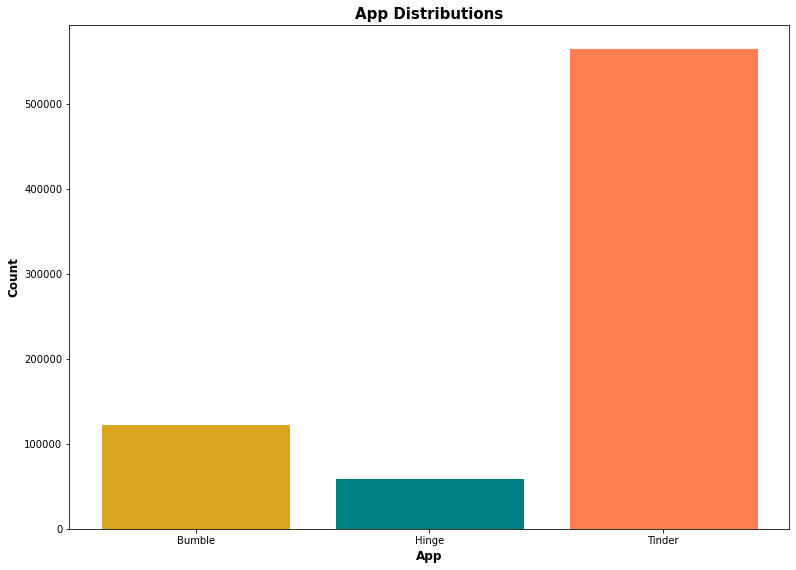

In [89]:
app = np.array(df['app'])
app, counts_app = np.unique(app, return_counts = True)
labels = ['Bumble', 'Hinge', 'Tinder']

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bar = plt.bar(x = app, height = counts_app, color = 'royalblue', edgecolor = 'black')
bar[0].set_color('goldenrod')
bar[1].set_color('teal')
bar[2].set_color('coral')
plt.title("App Distributions", weight = "bold", fontsize = 15)
plt.xlabel("App", weight = "bold", fontsize = 12)
plt.xticks(app, labels)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

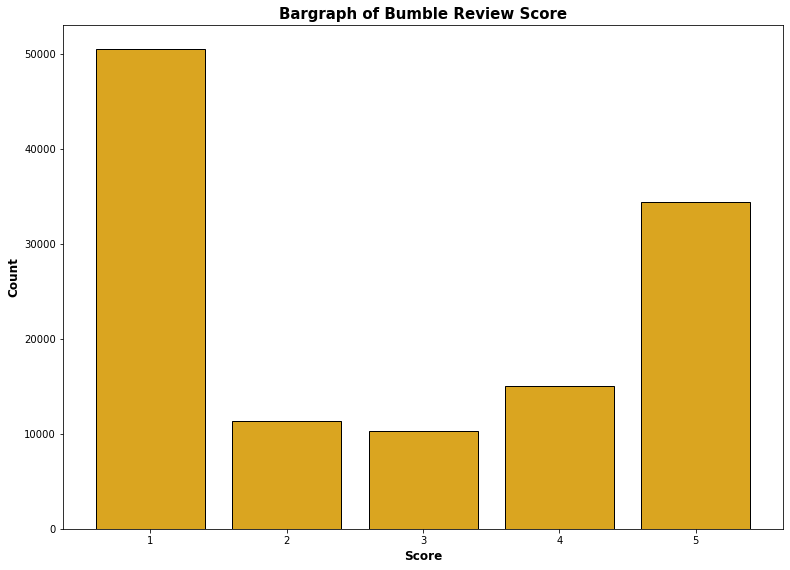

In [85]:
score_bum = np.array(df_bum2['score'])
score_bum, counts_bum = np.unique(score_bum, return_counts = True)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = score_bum, height = counts_bum, color = 'goldenrod', edgecolor = 'black')
plt.title("Bargraph of Bumble Review Score", weight = "bold", fontsize = 15)
plt.xlabel("Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

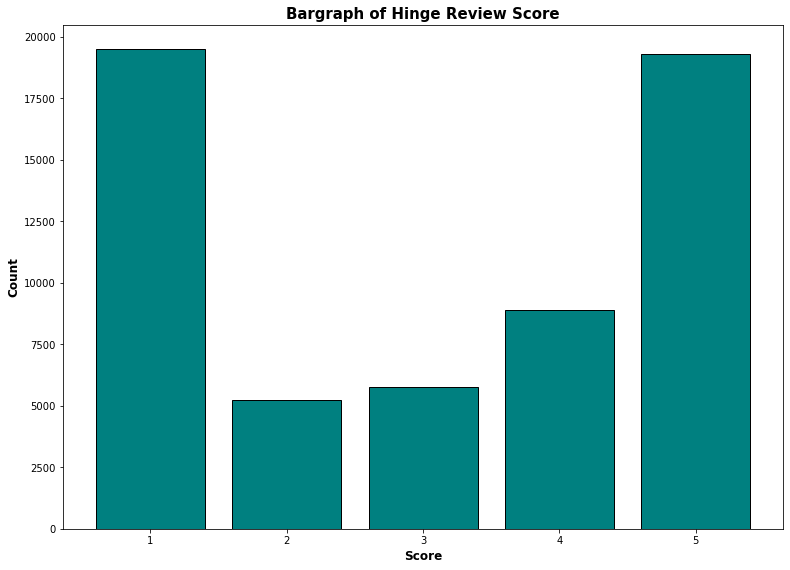

In [31]:
score_hin = np.array(df_hin2['score'])
score_hin, counts_hin = np.unique(score_hin, return_counts = True)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = score_hin, height = counts_hin, color = 'teal', edgecolor = 'black')
plt.title("Bargraph of Hinge Review Score", weight = "bold", fontsize = 15)
plt.xlabel("Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

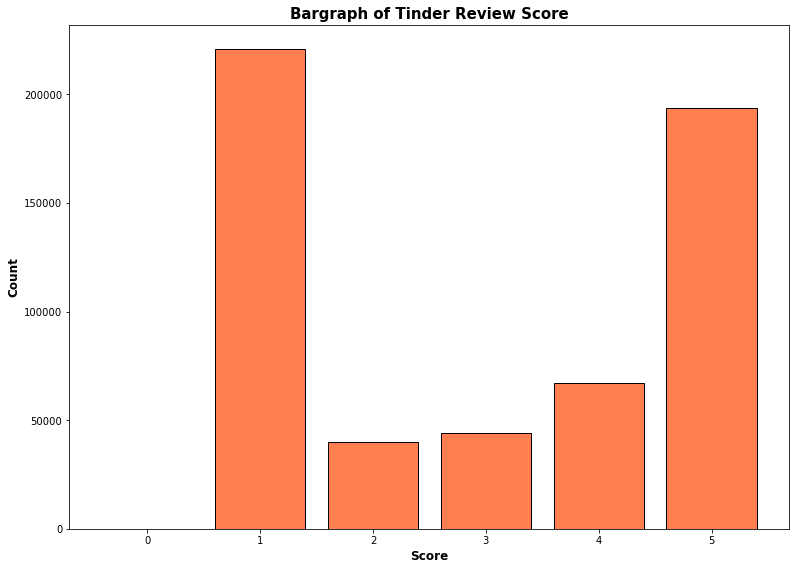

In [32]:
score_tin = np.array(df_tin2['score'])
score_tin, counts_tin = np.unique(score_tin, return_counts = True)

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = score_tin, height = counts_tin, color = 'coral', edgecolor = 'black')
plt.title("Bargraph of Tinder Review Score", weight = "bold", fontsize = 15)
plt.xlabel("Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

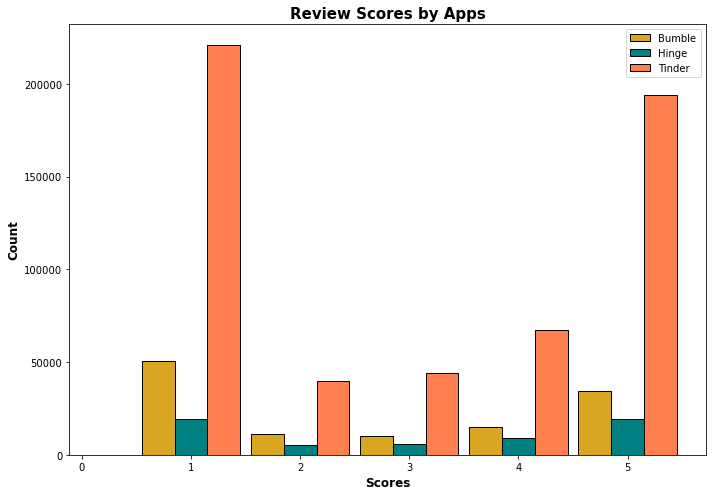

In [33]:
width = 0.30  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(score_bum - width, counts_bum, width, color = 'goldenrod', edgecolor = 'black', label='Bumble')
rects2 = ax.bar(score_hin, counts_hin, width, color = 'teal', edgecolor = 'black', label='Hinge')
rects2 = ax.bar(score_tin + width, counts_tin, width,  color = 'coral', edgecolor = 'black',label='Tinder')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores', weight = 'bold', fontsize = 12)
ax.set_ylabel('Count', weight = 'bold', fontsize = 12)
ax.set_title('Review Scores by Apps', weight = 'bold', fontsize = 15)
ax.legend()
fig.tight_layout()
plt.show()

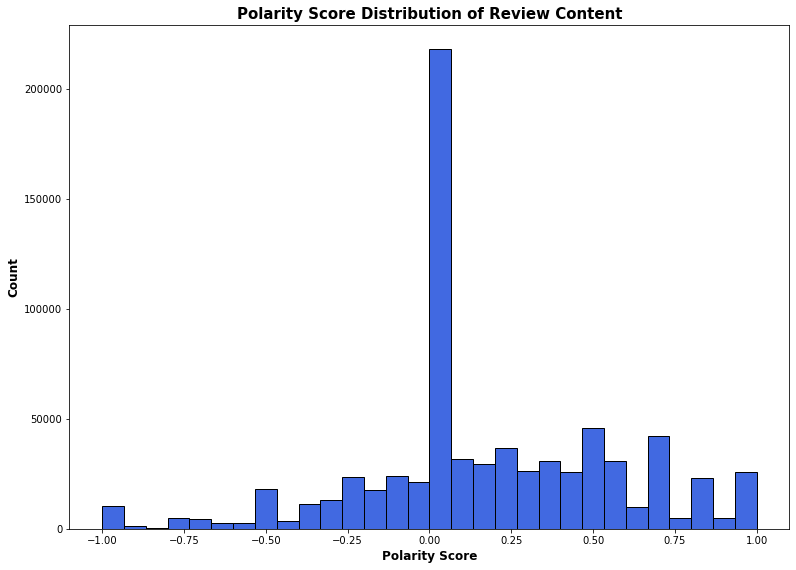

In [78]:
score_pol = np.array(df['polarity'])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(x = score_pol, color = 'royalblue', edgecolor = 'black', bins = 30)
plt.title("Polarity Score Distribution of Review Content", weight = "bold", fontsize = 15)
plt.xlabel("Polarity Score", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

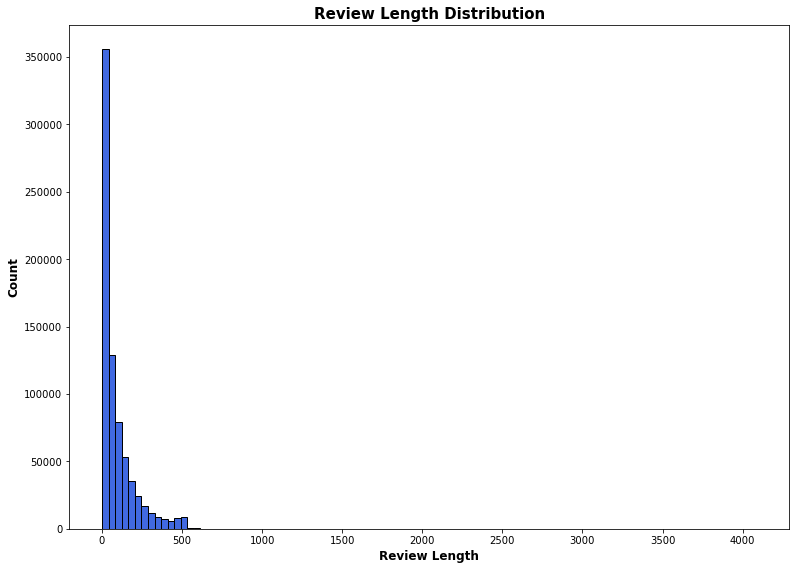

In [72]:
review_len = np.array(df['reviewLen'])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(x = review_len, color = 'royalblue', edgecolor = 'black',  bins = 100)
plt.title("Review Length Distribution", weight = "bold", fontsize = 15)
plt.xlabel("Review Length", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

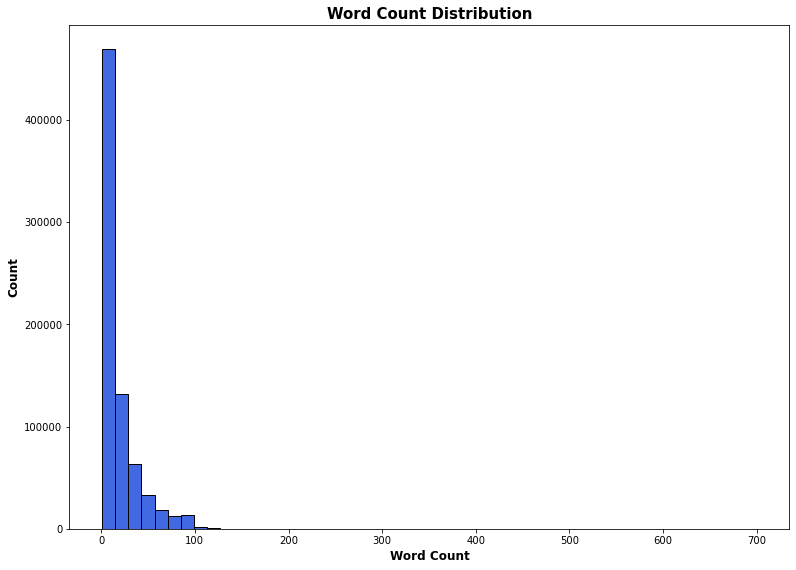

In [76]:
word_count = np.array(df['wordCount'])

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(x = word_count, color = 'royalblue', edgecolor = 'black', bins = 50)
plt.title("Word Count Distribution", weight = "bold", fontsize = 15)
plt.xlabel("Word Count", weight = "bold", fontsize = 12)
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

In [95]:
# common words after removing stop words
def getTopWords(corpus, n = None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_words = vec.transform(corpus)
    sum_words = bag_words.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [146]:
cmn_words = getTopWords(df['content'], 20)
bum_cmn_words = getTopWords(df_bum2['content'], 20)
hin_cmn_words = getTopWords(df_hin2['content'], 20)
tin_cmn_words = getTopWords(df_tin2['content'], 20)

In [147]:
df2 = pd.DataFrame(cmn_words, columns = ['Reviews', 'Count'])
df_bum3 = pd.DataFrame(bum_cmn_words, columns = ['Reviews', 'Count'])
df_hin3 = pd.DataFrame(hin_cmn_words, columns = ['Reviews', 'Count'])
df_tin3 = pd.DataFrame(tin_cmn_words, columns = ['Reviews', 'Count'])

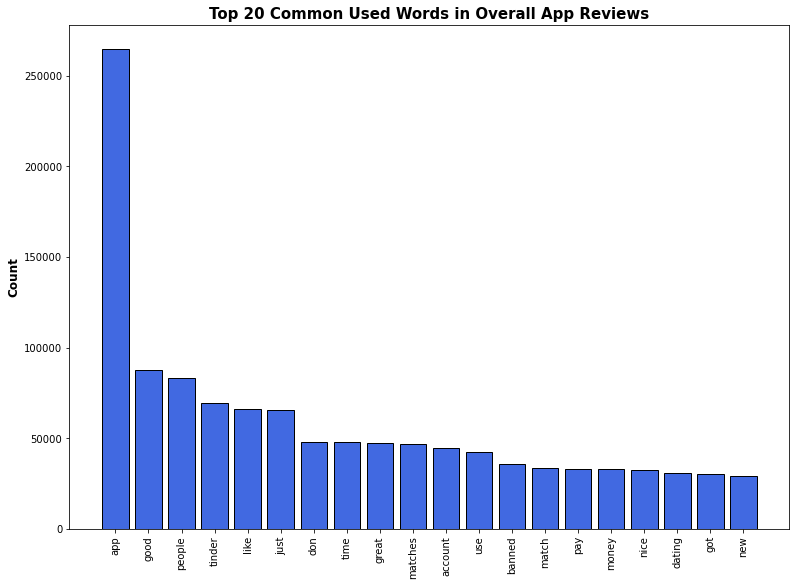

In [153]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df2['Reviews'], height = df2['Count'], color = 'royalblue', edgecolor = 'black')
plt.title("Top 20 Common Used Words in Overall App Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

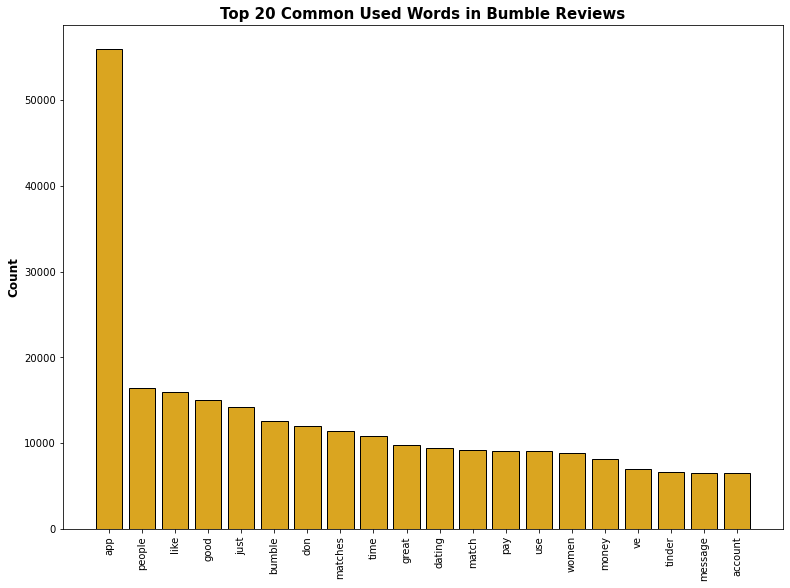

In [150]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_bum3['Reviews'], height = df_bum3['Count'], color = 'goldenrod', edgecolor = 'black')
plt.title("Top 20 Common Used Words in Bumble Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

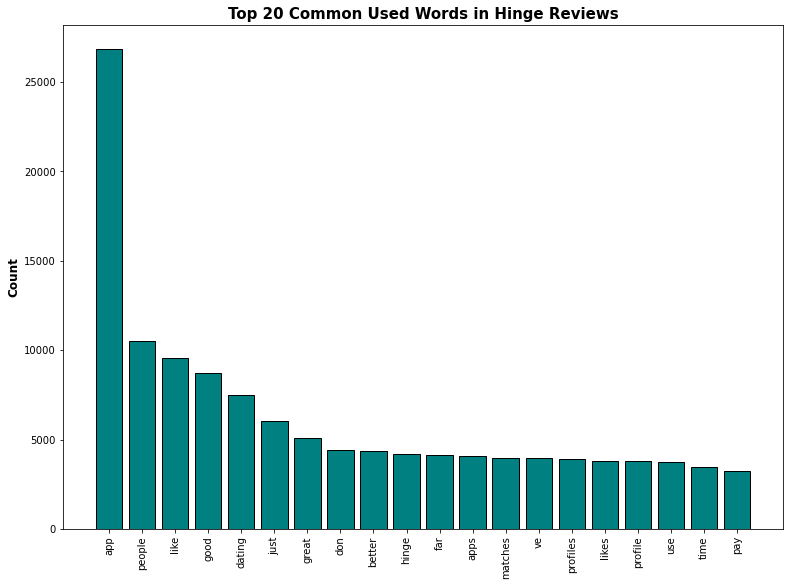

In [151]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_hin3['Reviews'], height = df_hin3['Count'], color = 'teal', edgecolor = 'black')
plt.title("Top 20 Common Used Words in Hinge Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()

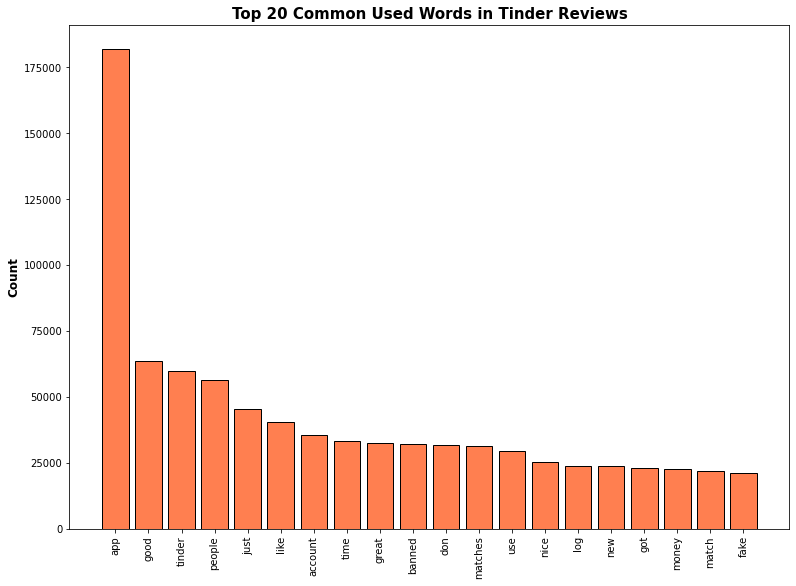

In [152]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.bar(x = df_tin3['Reviews'], height = df_tin3['Count'], color = 'coral', edgecolor = 'black')
plt.title("Top 20 Common Used Words in Tinder Reviews", weight = "bold", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.ylabel("Count", weight = "bold", fontsize = 12)
plt.show()